# Making a Neural Network Architecture in which the data sent will be trained and will conclude which pixel-value corresponds to which digit.

Solving a Multiclass classification problem using Artificial Neural Network using Keras library

In [101]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [102]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [103]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

In [104]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [105]:
X_train.shape
## showing that its a 3D array, meaning that each picture of a number has 28 rows and 28 columns 
## implying total 784 pixels per picture

(60000, 28, 28)

In [106]:
X_test.shape

(10000, 28, 28)

In [107]:
y_train
##contains labels(digits) for each picture

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

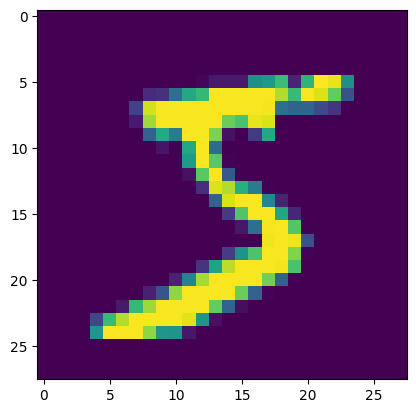

In [108]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

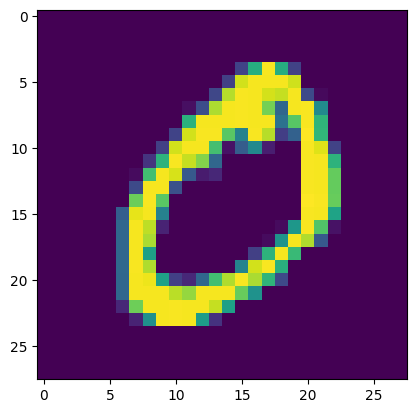

In [109]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1])

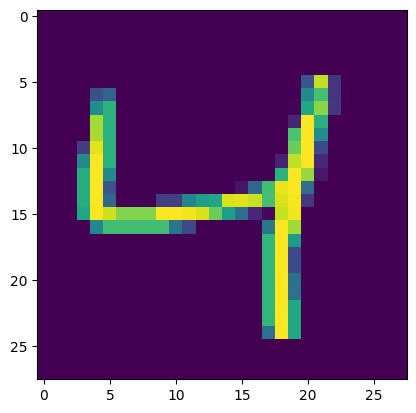

In [110]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [111]:
## as seen, in y_train, the numbers were 5,0,4 and the plots are also in the same sequence

In [112]:
## in neural networks, if the values are in a similar range, (eg., from 0 to 1) it becomes easier to train to that network
## so in the X_train, as we have 255 values from 0  to 255. So we'll convert these values into 0 to 1 range 
##by diviging each value by 255  

In [113]:
X_train = X_train/255
X_test = X_test/255

In [114]:
X_train[0]
## as seen, the 1st picture of X_train has all values in the range 0 to 1

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [115]:
model = Sequential()

In [116]:
model.add(Flatten(input_shape=(28, 28)))
## so that the 2D array is converted into 1D array

In [117]:
model.add(Dense(128, activation = 'relu')) ##128 nodes

In [118]:
model.add(Dense(10, activation = 'softmax')) ##since we have more than 1 node in the output, we use softmax

In [119]:
model.summary()
##100480 = 784*128+128 (784 inputs are sent to 128 nodes and also there are 128 biases)
##1290 = 128*10+10 (128 hidden layer parameters and 10 output layers (implies rates) + 10 biases)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [149]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam', metrics = ['accuracy'])
##compiling our model

In [152]:
history = model.fit(X_train, y_train, epochs=10, validation_split = 0.2) 
##training our model
##as we can see, our losss in the beginning was high but gradually it decreases
##epochs is number of times out model will recur on the data sent, here it is 10 times
##validation_split=0.2 implies that 20% random rows from whole data will be seperated for validation purpose

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0045 - accuracy: 0.9984 - val_loss: 0.1369 - val_accuracy: 0.9781
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 7.9289e-04 - accuracy: 0.9999 - val_loss: 0.1727 - val_accuracy: 0.9747
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0054 - accuracy: 0.9983 - val_loss: 0.1440 - val_accuracy: 0.9772
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.1472 - val_accuracy: 0.9781
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0053 - accuracy: 0.9984 - val_loss: 0.1601 - val_accuracy: 0.9757
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0022 - accuracy: 0.9993 - val_loss: 0.1535 - val_accuracy: 0.9777
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0038 - accuracy: 0.9990 - val_loss: 0.1828 - val_accur

In [153]:
##now the model is trained
##so we'll make some predictions implying it will return probability of 0 to 9 for all 10,000 images
y_prob = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [123]:
y_prob

array([[4.88551942e-11, 1.40854731e-10, 8.09834475e-08, ...,
        9.99966025e-01, 3.78444192e-08, 4.76091191e-06],
       [5.29660725e-11, 9.96371199e-08, 9.99999762e-01, ...,
        1.30259845e-17, 1.61546510e-07, 8.52397260e-16],
       [8.53637427e-09, 9.99889731e-01, 5.35866502e-06, ...,
        4.34920621e-05, 5.63663816e-05, 1.60099546e-07],
       ...,
       [1.54012003e-18, 6.30543227e-15, 2.20353901e-17, ...,
        4.13320578e-09, 3.45489637e-10, 2.43594975e-08],
       [4.18314819e-12, 3.86520243e-12, 3.68456606e-16, ...,
        6.65757467e-12, 7.74856730e-08, 2.25967140e-12],
       [3.84387133e-10, 2.17266746e-14, 1.16221421e-09, ...,
        1.06835753e-18, 8.88124142e-14, 9.83617078e-14]], dtype=float32)

In [154]:
y_prob.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [155]:
y_pred = y_prob.argmax(axis=1)

In [156]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.972

In [130]:
##97% accuracy reached

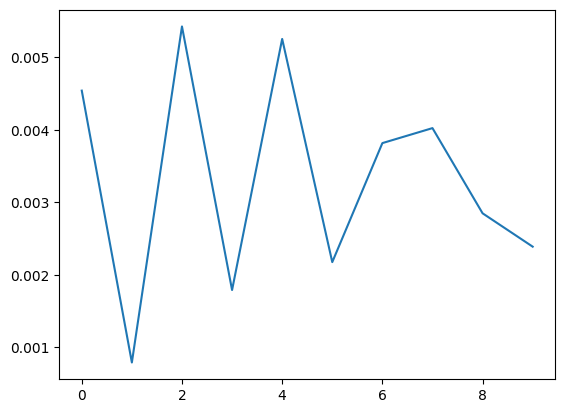

In [157]:
plt.plot(history.history['loss'])

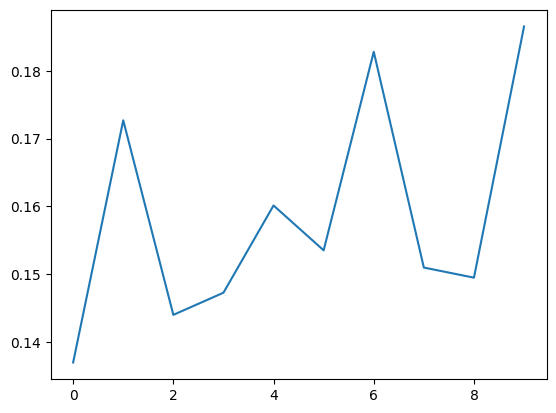

In [158]:
plt.plot(history.history['val_loss'])

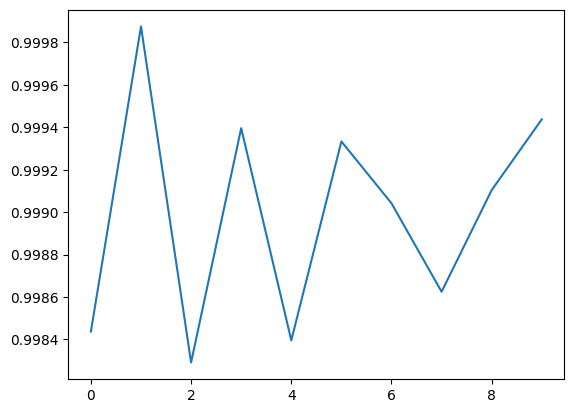

In [159]:
plt.plot(history.history['accuracy'])

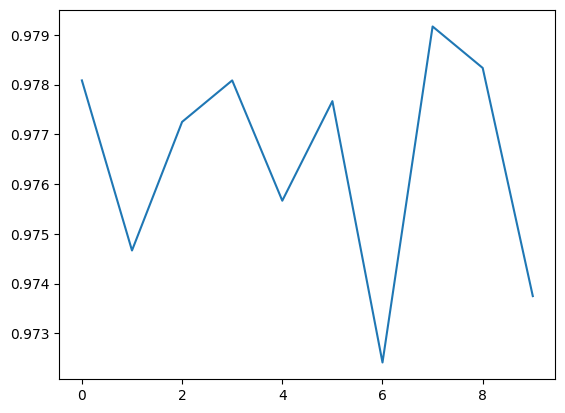

In [160]:
plt.plot(history.history['val_accuracy'])

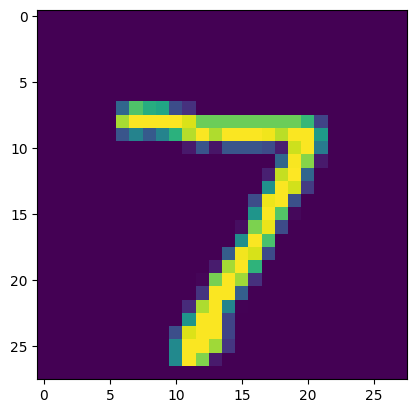

In [161]:
plt.imshow(X_test[0])

In [165]:
model.predict(X_test[0].reshape(1,28,28))

1/1 [==============================] - 0s 25ms/step


array([[5.3734477e-21, 6.3118295e-24, 7.6841355e-15, 1.6077290e-12,
        1.2313045e-27, 3.0356045e-19, 7.0414923e-23, 1.0000000e+00,
        1.6328010e-12, 3.3026483e-12]], dtype=float32)

In [166]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 23ms/step


array([7], dtype=int64)

In [169]:
##as seen, our prediction is correct
##lets try another image

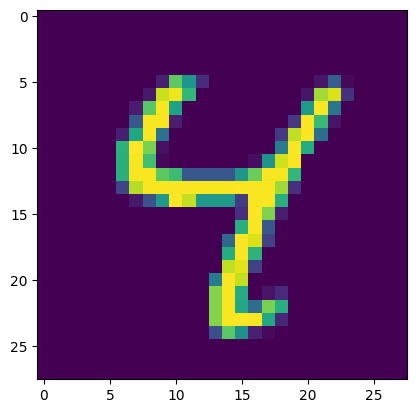

In [170]:
plt.imshow(X_test[6])

In [171]:
model.predict(X_test[6].reshape(1,28,28))

1/1 [==============================] - 0s 25ms/step


array([[2.0108737e-32, 9.7108883e-28, 7.8155431e-22, 3.0582384e-24,
        1.0000000e+00, 3.4031333e-16, 2.9322628e-24, 5.9928110e-17,
        7.5077838e-10, 2.1598150e-09]], dtype=float32)

In [173]:
model.predict(X_test[6].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 25ms/step


array([4], dtype=int64)

In [ ]:
##as seen, our prediction is correct again.